## 1. <font color='sky blue'> Mount Google Drive and Read the Data </font>

In [ ]:
# Mount Google Drive
#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
# Import the necessary libraries
import numpy as np
import pandas as pd

In [ ]:
#filepath = "/content/drive/My Drive/HelpMate AI Codes/Food App Reviews.csv"

# Load your dataset and convert the review column to list
#data = pd.read_csv(filepath)
data = pd.read_csv("GPT_Review.csv")


In [ ]:
# Display the data
data

,content
0,I feel like I am best friends with the smartes...
1,This app is very well you must download it 👍
2,perfect
3,Perfect
4,Has some audio issues on android... If you use...
...,...
89693,It is very useful app for everyone . You can a...
89694,"Love it. If you don't use chat gpt, you're gon..."
89695,"not the most accurate, but it's quite fast, wh..."
89696,کد های کوئرا رو از ۸۰ درصد به ۴۰ تبدیل میکنه و...


In [ ]:
reviews = data['content'].tolist()
reviews

['I feel like I am best friends with the smartest person on the planet.',
 'This app is very well you must download it 👍',
 'perfect',
 'Perfect',
 'Has some audio issues on android... If you use bluetooth headphones for a voice session then Close the app, turn off your Bluetooth headphones and then restart the app, the audio will be very quiet/inaudible. Unsure if it is using the wrong phone speaker, or just the volume is too low. But the only way to fix this is to turn on your Bluetooth headphones while in a voice conversation, then switch them off while in a voice conversation... And this will then cause the app to use the loud speaker.',
 'the best',
 'one of the best app services ever I used.',
 'amazing big time 👏',
 "I can't just describe it with words.. So helpful and magnificent way to learn and research an information, have a great capacity in discussions and the thing i love more about it ♡. Thank you developers.. Thank you chatgpt♡.",
 'good',
 'very good and active',
 'ama

## 2. <font color='sky blue'> Use SentenceTransformers to Generate Embeddings </font>

Sentence Transformers are advanced natural language processing models that encode sentences into high-dimensional vectors. These vectors encapsulate the semantic nuances of text, offering a robust foundation for various text-related tasks, such as clustering, classification, and more.

### The Hugging Face Connection
Hugging Face, a pioneering platform in NLP, hosts an array of pre-trained models, including Sentence Transformers, that can be readily employed for diverse applications. **sentence-transformers** is a library that provides easy methods to compute embeddings (dense vector representations) for sentences, paragraphs and images. Texts are embedded in a vector space such that similar text is close, which enables applications such as semantic search, clustering, and retrieval.

### Sentence Transformers Models
Hugging Face's [Sentence Transformers collection](https://huggingface.co/sentence-transformers) includes an assortment of models designed to cater to different use cases. From general-purpose models like BERT and RoBERTa to specialized models fine-tuned for specific tasks, the library provides a plethora of choices for generating embeddings that align with your data's context.


#### **`The Mini-LM-6-v2`** models
In this demonstration, we'll use a model from the `MiniLM-L6-v2` range of Sentence Transformer models to generate embeddings.



Specifically, we will try out the `all-MiniLM-L6-v2` model. The `all-MiniLM-L6-v2` sentence transformer, trained on a large dataset of over 1 billion training pairs, is a model that maps sentences and paragraphs to a 384-dimensional dense vector space. The `all-MiniLM-L6-v2` model is designed as a general-purpose model and offers good quality embeddings. It can be used for tasks like clustering or semantic search.

In [ ]:
# Install the necessary libraries
!pip install sentence-transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 171.5/171.5 kB 4.3 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-m

In [ ]:
# Import the SentenceTransformer library
from sentence_transformers import SentenceTransformer

In [ ]:
# Load the embedding model

model_name = "all-MiniLM-L6-v2"
model = SentenceTransformer(model_name)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [ ]:
# Generate sentence embeddings
embeddings = model.encode(reviews)

In [ ]:
embeddings

array([[-0.07134704, -0.00374606,  0.07767925, ...,  0.03715125,
        -0.06413711, -0.04064156],
       [-0.04002726, -0.07972649,  0.0544189 , ...,  0.12915808,
        -0.02290428,  0.02297878],
       [ 0.00069899,  0.04271882, -0.00833006, ...,  0.02032427,
        -0.04084439,  0.05664884],
       ...,
       [ 0.02542356, -0.00960409, -0.00941148, ..., -0.07101251,
         0.00094599,  0.09813736],
       [-0.0007817 ,  0.05470193, -0.05959206, ...,  0.01240931,
        -0.02932025, -0.05258966],
       [ 0.02531496,  0.06337341, -0.01710591, ..., -0.03451871,
        -0.02496497, -0.02875655]], dtype=float32)

In [ ]:
# Size/Dimension of each embedding
embeddings[0].shape


(384,)

## 3. <font color='sky blue'> Visualise the Embeddings through Dimensionality Reduction </font>

<p align="justify"> Modern datasets often consist of numerous features or attributes, which creates a high-dimensional space in which our data resides. However, when trying to comprehend or visualize such data directly, we run into limitations – our brains struggle to visualize beyond three dimensions, and traditional visualization methods might not accurately represent the relationships between data points in high-dimensional spaces.


UMAP, which stands for [Uniform Manifold Approximation and Projection](https://https://pair-code.github.io/understanding-umap/) is a dimensionality reduction technique that reveals local and global data relationships. It transforms high-dimensional data into a lower-dimensional space, helping us visualize clusters, trends, and similarities.


[UMAP](https://umap-learn.readthedocs.io/en/latest/) is a powerful tool in Python that can help us perform dimensionality reduction.

In [ ]:
# Install the umap-learn library

!pip install umap-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.8/56.8 kB 6.9 MB/s eta 0:00:00


In [ ]:
# Import umap for dimensionality reduction and matplotlib for plotting
from umap import UMAP
import matplotlib.pyplot as plt

In [ ]:
# Generate tensor embeddings

embeddings = model.encode(reviews, convert_to_tensor=True)

In [ ]:
embeddings

tensor([[-0.0216, -0.0238,  0.0138,  ..., -0.0616,  0.0163,  0.0055],
        [-0.0973,  0.1108, -0.0130,  ..., -0.0525,  0.0161,  0.1045],
        [ 0.0157,  0.0159,  0.0094,  ...,  0.0405, -0.1067, -0.0117],
        ...,
        [ 0.0284, -0.0074,  0.0431,  ..., -0.0554, -0.0307, -0.0080],
        [ 0.0812,  0.0813,  0.0203,  ...,  0.0325, -0.0380,  0.0435],
        [ 0.0011,  0.0892,  0.0847,  ..., -0.0047, -0.0342, -0.0237]])

In [ ]:
# Reduce dimensionality with UMAP

reducer = UMAP(n_components = 2, metric='cosine')
# metric = hamming/euclideanhamming/jaccard/dice/russellrao/kulsinski/rogerstanimoto/sokalmichener/sokalsneath/yule
embeddings_2d = reducer.fit_transform(embeddings.cpu())

In [ ]:
embeddings_2d

array([[10.0980015, 10.520052 ],
       [10.804983 , -0.6712063],
       [-9.121894 , 12.705749 ],
       ...,
       [ 7.4925623,  8.080866 ],
       [ 0.8998054,  5.9304304],
       [ 0.9232754,  5.93953  ]], dtype=float32)

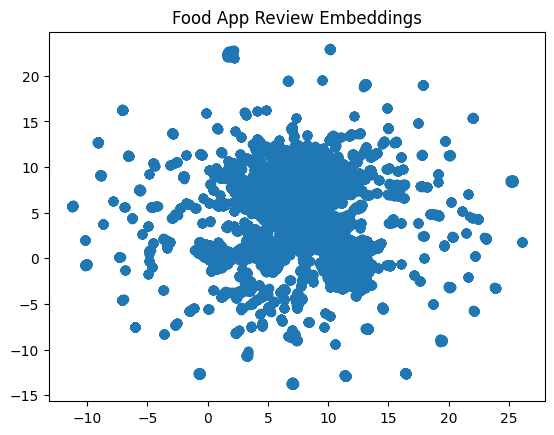

In [ ]:
# Plot the embeddings

plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], marker = 'o')
plt.title('Food App Review Embeddings')
plt.show()

## 4. <font color='sky blue'> Cluster and Visualise the Embeddings with Plotly </font>

<p align="justify"> Let's now try and interpret the embedding space. We will first cluster the data points to check similar sentences. Clustering is a vital technique that groups similar data points together based on their closeness to each other.

#### From Embeddings to Clusters

<p align="justify"> By applying clustering algorithms to our embeddings, we can group together similar embeddings, effectively creating clusters of related data points. This process enables us to uncover meaningful categories or classes within our data and helps us interpret what the clusters actually mean

In [ ]:
# Import the KMeans library

from sklearn.cluster import KMeans

In [ ]:
# Apply K-means clustering
num_clusters = 3
kmeans = KMeans(n_clusters=num_clusters)
cluster_labels = kmeans.fit_predict(embeddings_2d)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
# Add cluster labels as a new column to the DataFrame
data['cluster_label'] = cluster_labels

In [ ]:
data

,content,cluster_label
0,I feel like I am best friends with the smartes...,2
1,This app is very well you must download it 👍,0
2,perfect,2
3,Perfect,2
4,Has some audio issues on android... If you use...,1
...,...,...
89693,It is very useful app for everyone . You can a...,1
89694,"Love it. If you don't use chat gpt, you're gon...",1
89695,"not the most accurate, but it's quite fast, wh...",2
89696,کد های کوئرا رو از ۸۰ درصد به ۴۰ تبدیل میکنه و...,1


In [ ]:
!pip install plotly

In [ ]:
import plotly.express as px

# Create a DataFrame for the data
cluster_df = pd.DataFrame({
    'x': embeddings_2d[:, 0],
    'y': embeddings_2d[:, 1],
    'label': cluster_labels,
    'sentence': data['content']
})

# Create an interactive scatter plot using plotly
fig = px.scatter(
    cluster_df,
    x='x', y='y',
    color='label',
    hover_name='sentence',
    title='Food App Reviews 2D Embeddings',
    labels={'label': 'Cluster'},
    width=800,  # Adjust the width as desired
    height=600,  # Adjust the height as desired
)

fig.update_traces(
    marker=dict(size=8)  # Adjust the size value as needed
)

# Set the background color to black
fig.update_layout(
    plot_bgcolor='white',
)

fig.show()

Output hidden; open in https://colab.research.google.com to view.

##<font color = "sky blue"> 5. Visualise the Embeddings in 3D </font>

Let's now try to visualise the same embeddings in 3D. The process is almost exactly the same. This time, we will use the UMAP function to reduce the dimension to 3 instead of 2.

In [ ]:
# Reduce dimensionality to 3 dimensions with UMAP

reducer = UMAP(n_components=3, metric='cosine')
embeddings_3d = reducer.fit_transform(embeddings.cpu())

In [ ]:
# Apply K-means clustering
num_clusters = 3
kmeans = KMeans(n_clusters=num_clusters)
cluster_labels = kmeans.fit_predict(embeddings.cpu())

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [ ]:
# Add cluster labels as a new column to the DataFrame
data['cluster_label'] = cluster_labels

In [ ]:
data

,content,cluster_label
0,I feel like I am best friends with the smartes...,0
1,This app is very well you must download it 👍,1
2,perfect,2
3,Perfect,2
4,Has some audio issues on android... If you use...,0
...,...,...
89693,It is very useful app for everyone . You can a...,1
89694,"Love it. If you don't use chat gpt, you're gon...",0
89695,"not the most accurate, but it's quite fast, wh...",0
89696,کد های کوئرا رو از ۸۰ درصد به ۴۰ تبدیل میکنه و...,0


In [ ]:
# Create a DataFrame for the data
cluster_df = pd.DataFrame({
    'x': embeddings_3d[:, 0],
    'y': embeddings_3d[:, 1],
    'z': embeddings_3d[:, 2],
    'label': cluster_labels,
    'sentence': data['content']
})

# Create a 3D scatter plot using plotly
fig = px.scatter_3d(
    cluster_df,
    x='x', y='y', z='z',
    color='label',
    hover_name='sentence',
    title='Food App Reviews 3D Embeddings',
    labels={'label': 'Cluster'},
)

fig.update_traces(
    marker=dict(size=5)  # Adjust the size value as needed
)

fig.show()

Output hidden; open in https://colab.research.google.com to view.